This is a working notebook that was used to modify the Chicago Data Portal's [block shapefiles](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Census-Blocks-2010/mfzt-js4n) so that they do not contain parts of Lake Michigan. This was done by intersecting them with tract shapefiles and deleting the parts of the block shapefiles that do not overlap. 

Because we saved the output of this notebook to `blocks.shp`, note that this notebook cannot be run again without re-downloading the origin block shapefiles. We are retaining it in the repository for reproducibility purposes.

In [1]:
import os
import sys
sys.path[0] = os.path.join(os.path.abspath(''),'..')  # make sure we can import from our package

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from data_pipeline import spatial_operations as so
import numpy as np
import pandas as pd
import geopandas as gpd

/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


<AxesSubplot:>

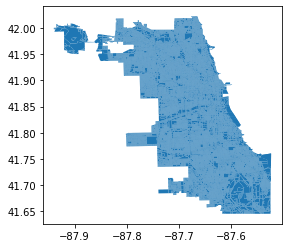

In [4]:
blocks = so.get_shapefile('block')
blocks.plot()

In [8]:
blocks

,individual_block,countyfp10,geoid10,name10,statefp10,block,tract,geometry
0,2010,031,170316903002010,Block 2010,17,6903002010,690300,"POLYGON ((-87.62907 41.76909, -87.62905 41.768..."
1,3007,031,170316809003007,Block 3007,17,6809003007,680900,"POLYGON ((-87.63412 41.77447, -87.63410 41.774..."
2,3013,031,170316809003013,Block 3013,17,6809003013,680900,"POLYGON ((-87.63485 41.77263, -87.63522 41.772..."
3,4019,031,170312909004019,Block 4019,17,2909004019,290900,"POLYGON ((-87.73841 41.85913, -87.73842 41.859..."
4,4016,031,170312925004016,Block 4016,17,2925004016,292500,"POLYGON ((-87.73217 41.85476, -87.73226 41.854..."
...,...,...,...,...,...,...,...,...
46352,1028,031,170312203001028,Block 1028,17,2203001028,220300,"POLYGON ((-87.69323 41.92767, -87.69385 41.927..."
46353,1030,031,170312203001030,Block 1030,17,2203001030,220300,"POLYGON ((-87.69320 41.92667, -87.69351 41.926..."
46354,2014,031,170318310002014,Block 2014,17,8310002014,831000,"POLYGON ((-87.67759 41.91624, -87.67759 41.916..."
46355,2001,031,170318310002001,Block 2001,17,8310002001,831000,"POLYGON ((-87.67398 41.91783, -87.67397 41.917..."


/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


<AxesSubplot:>

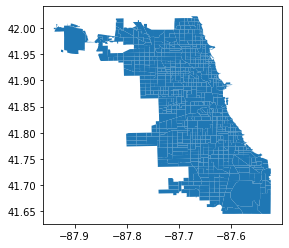

In [5]:
tracts = so.get_shapefile('tract')
tracts.plot()

In [9]:
tracts

,Shape_Leng,Shape_Area,SqMiles,GEOID2,tract,geometry
0,6102.900390,1.777035e+06,0.000000,76840801,840801,"MULTIPOLYGON (((-87.92000 41.95815, -87.92000 ..."
1,16035.054991,8.947394e+06,0.320945,59840300,840300,"POLYGON ((-87.67528 41.83039, -87.67552 41.830..."
2,14719.012184,8.946045e+06,0.320896,60840200,840200,"POLYGON ((-87.64160 41.84630, -87.64159 41.846..."
3,15186.400644,1.230614e+07,0.441424,34841100,841100,"POLYGON ((-87.62935 41.85295, -87.62935 41.852..."
4,10472.230299,6.731931e+06,0.241476,31841200,841200,"POLYGON ((-87.67849 41.85894, -87.67848 41.858..."
...,...,...,...,...,...,...
803,13232.831455,1.060785e+07,0.380506,63630300,630300,"POLYGON ((-87.70377 41.80082, -87.70375 41.800..."
804,10648.157958,7.085428e+06,0.254156,63630400,630400,"POLYGON ((-87.69380 41.79369, -87.69404 41.793..."
805,10637.040410,7.079999e+06,0.253961,63630500,630500,"POLYGON ((-87.68422 41.80115, -87.68422 41.800..."
806,10625.328587,7.059211e+06,0.253215,63630800,630800,"POLYGON ((-87.69360 41.78641, -87.69384 41.786..."


We want to remove the part of the blocks that are in the lake.

/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/array.py:644: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  data[:] = [
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/array.py:242: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  data[:] = [


<AxesSubplot:>

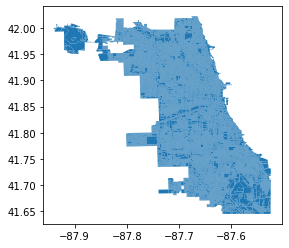

In [6]:
intersect = gpd.overlay(blocks,tracts,how="intersection")
intersect.plot()

In [10]:
intersect.dissolve(by="block")

/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,geometry,individual_block,countyfp10,geoid10,name10,statefp10,tract_1,Shape_Leng,Shape_Area,SqMiles,GEOID2,tract_2
block,,,,,,,,,,,,
101001000,"POLYGON ((-87.66666 42.02243, -87.66671 42.022...",1000,031,170310101001000,Block 1000,17,010100,9344.924409,3.947738e+06,0.141606,01010100,10100
101001001,"POLYGON ((-87.66763 42.02224, -87.66823 42.022...",1001,031,170310101001001,Block 1001,17,010100,9344.924409,3.947738e+06,0.141606,01010100,10100
101001002,"POLYGON ((-87.66994 42.02226, -87.66823 42.022...",1002,031,170310101001002,Block 1002,17,010100,9344.924409,3.947738e+06,0.141606,01010100,10100
101001003,"POLYGON ((-87.67047 42.02115, -87.67072 42.021...",1003,031,170310101001003,Block 1003,17,010100,9344.924409,3.947738e+06,0.141606,01010100,10100
101002000,"POLYGON ((-87.67007 42.02297, -87.67009 42.022...",2000,031,170310101002000,Block 2000,17,010100,9344.924409,3.947738e+06,0.141606,01010100,10100
...,...,...,...,...,...,...,...,...,...,...,...,...
9801001006,"POLYGON ((-87.74266 41.79010, -87.74249 41.790...",1006,031,170319801001006,Block 1006,17,980100,23908.141873,3.187548e+07,1.143380,56980100,980100
9801001007,"POLYGON ((-87.74156 41.78959, -87.74156 41.789...",1007,031,170319801001007,Block 1007,17,980100,23908.141873,3.187548e+07,1.143380,56980100,980100
9801001008,"POLYGON ((-87.74165 41.78789, -87.74159 41.788...",1008,031,170319801001008,Block 1008,17,980100,23908.141873,3.187548e+07,1.143380,56980100,980100


/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


<AxesSubplot:>

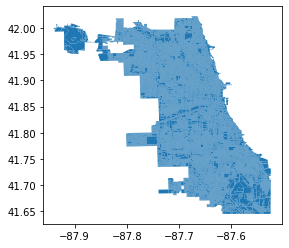

In [11]:
intersect.plot()

Nice.

In [12]:
intersect.to_file('/Users/drewkeller/Desktop/CS/broadbandequity/geo/blocks.shp')